# SPMpy 
* Authors : Dr. Jewook Park at CNMS, ORNL
    * Center for Nanophase Materials Sciences (CNMS), Oak Ridge National Laboratory (ORNL), United States
    * email :  parkj1@ornl.gov
        
> **SPMpy** is a Python package to analyze scanning probe microscopy (SPM) data analysis, such as scanning tunneling microscopy and spectroscopy (STM/S) data and atomic force microscopy (AFM) images, which are inherently multidimensional. SPMpy exploits recent image processing(a.k.a. Computer Vision) techniques and utilizes [building blocks](https://scipy-lectures.org/intro/intro.html#the-scientific-python-ecosystem) and excellent visualization tools available in the [scientific Python ecosystem](https://holoviz.org/index.html). Many parts are inspired by well-known SPM data analysis programs, for example, [Wsxm](http://www.wsxm.eu/) and [Gwyddion](http://gwyddion.net/). SPMpy is trying to apply lessons from [Fundamentals in Data Visualization](https://clauswilke.com/dataviz/).

>  **SPMpy** is an open-source project. (Github: https://github.com/jewook-park/SPMpy_ORNL )
> * Contributions, comments, ideas, and error reports are always welcome. Please use the Github page or email parkj1@ornl.gov. Comments & remarks should be in Korean or English. 

# Create pptx file to summarize 2D SPM dataset 


* use *fileloading_functions* in SPMpy_ORNL
    * **Nanonis** 2D data (*.sxm) files  $\to$  **Xarray** (DataSet or DataArray) (or **PANDAS**  (DataFrame) )
* create pptx file $\to$ add image title & 2D images
    * add image title ( scan condition info & experimental conditions ) 
    * topography + LDOS image(locking dI/dV)
    * generate FFT 
    * save pptx
    


# <font color= orange > 0. Preparation  </font>

In [1]:
#############################
# check all necessary package
#############################

import glob
import os
from warnings import warn

import numpy as np
import pandas as pd

try:
    from ipyfilechooser import FileChooser
except ModuleNotFoundError:
    warn("ModuleNotFoundError: No module named ipyfilechooser")
    !pip install ipyfilechooser 
    from ipyfilechooser import FileChooser

try:
    import xrft
except ModuleNotFoundError:
    warn("ModuleNotFoundError: No module named xrft")
    !pip install xrft
    import xrft

In [2]:
########################################
#    * Step 1-1
#    : Import necessary packages
#        import modules
#########################################

import glob
import math
import os
from warnings import warn

import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import skimage
from scipy import signal
from SPMpy_2D_data_analysis_funcs import *
from SPMpy_fileloading_functions import (
    grid2xr,
    grid_line2xr,
    gwy_df_ch2xr,
    gwy_img2df,
    img2xr,
)

# some packages may be yet to be installed
try:
    from pptx import Presentation
except ModuleNotFoundError:
    warn("ModuleNotFoundError: No module named Presentation")
    !pip install python-pptx
    from pptx import Presentation
    from pptx.util import Inches, Pt

try:
    import nanonispy as nap
except ModuleNotFoundError:
    warn("ModuleNotFoundError: No module named nanonispy")
    !pip install nanonispy
    import nanonispy as nap

try:
    import seaborn_image as isns
except ModuleNotFoundError:
    warn("ModuleNotFoundError: No module named seaborn-image")
    #!pip install --upgrade scikit-image == 0.19.0.dev0
    !pip install --upgrade seaborn-image
    import seaborn_image as isns

try:
    import xarray as xr
except ModuleNotFoundError:
    warn("ModuleNotFoundError: No module named xarray")
    #!pip install --upgrade scikit-image == 0.19.0.dev0
    !pip install xarray
    import xarray as xr

try:
    import xrft
except ModuleNotFoundError:
    warn("ModuleNotFoundError: No module named xrft")
    !pip install xrft
    import xrft
    

try:
    import holoviews as hv
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named holoviews')
    !pip install holoviews 
    import holoviews as hv

try:
    import seaborn_image as isns
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named seaborn_image')
    !conda install -c conda-forge seaborn-image
    import seaborn_image as isns
    
    
    
try:
    import hvplot.xarray
    import hvplot.pandas 
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named hvplot')
    !pip install hvplot
    import hvplot.xarray
    import hvplot.pandas 



try:
    import gwyfile
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named gwyfile')
    !pip install gwyfile
    import gwyfile
 

# <font color= orange > 1. Choose Folder & DataFrame for files  </font>

In [3]:
###########################################
# Create and display a FileChooser widget #
###########################################
file_chooser = FileChooser("")
display(file_chooser)

FileChooser(path='C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Research\Data Analysis (python)\SPMpy_…

In [4]:
##############################
# After choose the folder    #
# Files DataFrame            #
##############################

folder_path = file_chooser.selected_path
print("folder_path = ", file_chooser.selected_path)
print("selected file name = ", file_chooser.selected_filename)
from SPMpy_fileloading_functions import files_in_folder

files_df = files_in_folder(folder_path)

folder_path =  C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\mK STM DATA\2023\0528 FeTe0.55Se0.45(old)_PtIr_Tip6_LHeT_Jewook
selected file name =  FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x0.01_f0.01)_20230529_00002.sxm
Current Path =  C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Research\Data Analysis (python)\SPMpy_ORNL
Changed Path =  C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\mK STM DATA\2023\0528 FeTe0.55Se0.45(old)_PtIr_Tip6_LHeT_Jewook
                                                group  num  \
0   FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x0.01_f0.01...  001   
1   FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x0.01_f0.01...  002   
2   FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x0.01_f0.01...  003   
3   FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x0.01_f0.01...  004   
4   FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x1_f1)_2023...  001   
5   FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x1_f1)_2023...  002   
6   FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x0.01_f0.01...  NaN   
7   FeTe0.55Se0.45_old_PtIr_tip6_LH

# <font color= orange > 2. loading files & data import    </font>

In [5]:
#######

files_df

sxm_file_list_df = files_df[files_df.type == "sxm"]
# file_list_df

# use sxm file list only 
sxm_file_groups = list(set(sxm_file_list_df["group"]))
# file groups
sxm_file_groups
#############################
# sxm file loading by using img2xr
#  convert to xr format
# (e.g.) # img2xr(file_list_df.file_name.iloc[0])
#############################
# spmdata_xr = img2xr(file_list_df.file_name[0])

['FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x1_f1)_20230529_00',
 'FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x0.01_f0.01)_20230529_00']

# <font color= orange > 3. Creating PPTX file </font>

In [6]:
###############################
# new pptx file 
# overwrite everytime 
###############################

folder_name  = os.getcwd().split('\\')[-1]
# final folder 
pptx_file_name =  folder_name+ '_automated.pptx'

prs = Presentation() # empty_file #
#``` Page 0 ``````````
sld0_slide_layout = prs.slide_layouts[0] # title slide (layout_type =  [0] )

slide0 = prs.slides.add_slide(sld0_slide_layout)
# add title slide in the pptx file # 

# title page set up 
sld0_title = slide0.shapes.title
sld0_subtitle = slide0.placeholders[1]
# title & sub_title for the title slide (0th) 
 
sld0_title.text = 'Nanonois 2D images' + '\n' +  'in '+ folder_name 
# set title 
sld0_subtitle.text = 'by using SPMpy \n  Jewook Park '

#``` Page 1 ``````````

sld1_slide_layout = prs.slide_layouts[1] # bullet_slide # title+content
slide1 = prs.slides.add_slide(sld1_slide_layout)
#add page  1 slide
slide1_title  = slide1.shapes.title
slide1_contents  = slide1.shapes.placeholders[1].text_frame
# choose 'shapes' in 'slide1' 
# assigne 'title' & 'contents(text)'  in 'shapes' 

slide1_title.text = 'file list (*.sxm)' # set title
slide1_contents.text = 'file groups' # set contents
# add 'text' in the 'title'  object 

for group in sxm_file_groups:
    sld1_paragraph_1 = slide1_contents.add_paragraph()
    sld1_paragraph_1.text = group
    sld1_paragraph_1.level = 2   
    # add paragraph in the contents  : group name
    sld1_paragraph_1 = slide1_contents.add_paragraph()
    sld1_paragraph_1.text = files_df[files_df.group ==  group].file_name.min() + '\n ~ ' + files_df[files_df.group ==  group].file_name.max()
    sld1_paragraph_1.level = 3    
    # add paragraph in the contents  : Files (start-end) name
prs.save(pptx_file_name)  

# add group_name & number of files as a paragraph




# <font color= orange > 4. add data page </font>

scan direction (up/down):  up
FeTe0.55Se0.45_old_PtIr_tip6_LHeT_(x0.01_f0.01)_20230529_00001
32 nm x 32 nm  V = 0.1 V  I = 200 pA 
['LI_Demod_1_X']
step_dx == step_dy
z_LIX_fNb_xr step_dx, step_dy =  ["'Y': 512, 'X': 512"]
z_fwd_isns
z_bwd_isns
LIX_fwd_isns
LIX_bwd_isns


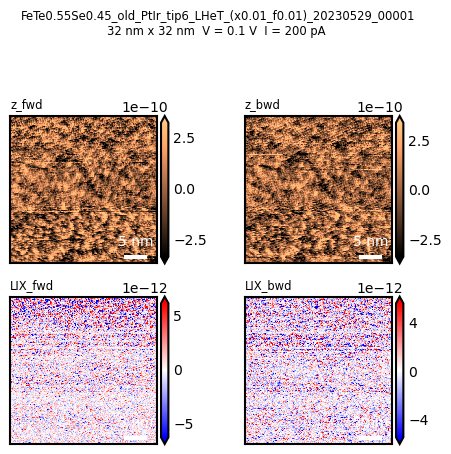

np.log & np.abs after fft
np.log & np.abs after fft
np.log & np.abs after fft
np.log & np.abs after fft
z_fwd_fft_isns
z_bwd_fft_isns
LIX_fwd_fft_isns
LIX_bwd_fft_isns


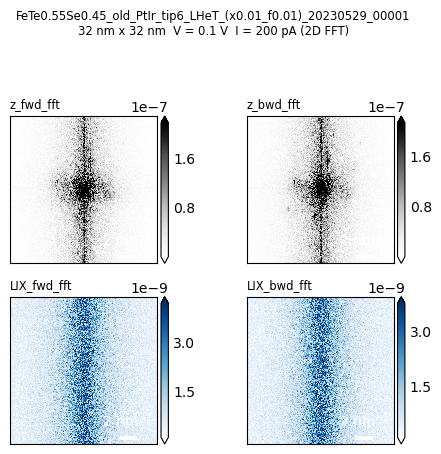

OSError: [Errno 22] Invalid argument

In [7]:
#from pptx import Presentation
from pptx.util import Inches
from pptx.util import Cm, Pt

for files_name in files_df[files_df.type ==  'sxm'].file_name:
    spmdata_xr = img2xr(files_name)

    # open previously prepared pptx 
    prs = Presentation(pptx_file_name)

    if spmdata_xr.multipass == True :
        # split spmdata_xr as  spmdata_P1_xr & spmdata_P2_xr
        # 
        spmdata_P1_xr = spmdata_xr.drop(['Z_P2fwd', 'Z_P2bwd','LIX_P2fwd', 'LIX_P2bwd'])
        spmdata_P2_xr = spmdata_xr.drop(['Z_P1fwd', 'Z_P1bwd','LIX_P1fwd', 'LIX_P1bwd'])

        # rename channel names after split dual XR 

        spmdata_P1_xr = spmdata_P1_xr.rename ({'Z_P1fwd': 'Z_fwd', 'Z_P1bwd': 'Z_bwd', 'LIX_P1fwd': 'LIX_fwd', 'LIX_P1bwd': 'LIX_bwd'})
        spmdata_P2_xr = spmdata_P2_xr.rename ({'Z_P2fwd': 'Z_fwd', 'Z_P2bwd': 'Z_bwd', 'LIX_P2fwd': 'LIX_fwd', 'LIX_P2bwd': 'LIX_bwd'})
        
        # set P1 P2 title
        
        spmdata_P1_xr.attrs['title'] =  spmdata_P1_xr.title.split('//')[0]
        spmdata_P2_xr.attrs['title'] = spmdata_P2_xr.title.split('Pass1')[0]+spmdata_P2_xr.title.split('//')[-1]
        
        
        ###########################
        # P1 page setting 
        
        img_sld_slide_layout = prs.slide_layouts[6] # image slide (layout_type =  [6] )
        img_sld = prs.slides.add_slide(img_sld_slide_layout)
        # textbox setting
        left_textbox = Inches(0)
        top_textbox = Inches(0)
        width_textbox = Inches(4)
        height_textbox = Inches(1)
        txBox  = img_sld.shapes.add_textbox(left_textbox, top_textbox,width_textbox,height_textbox )

        tx_frame = txBox.text_frame 
        tx_frame.text =  spmdata_xr.title

        # real space figure 
        left = Inches(0)
        top = Inches(1)

        spm_data_plot = xr_isns_plot_r_space(plane_fit_x_xr(plane_fit_y_xr(spmdata_P1_xr)),
                                             figsize= (5,6))
        spm_data_plot.savefig('spm_data_plot_temp1.png', 
                              bbox_inches='tight', dpi = 300)

        r_space_img = img_sld.shapes.add_picture('spm_data_plot_temp1.png', 
                                               left, 
                                               top)
        # momentum space figure
        spm_data_fft_plot = xr_isns_plot_k_space(twoD_FFT_xr( plane_fit_x_xr(plane_fit_y_xr(spmdata_P1_xr))), 
                                                 figsize= (5,6),
                                                 zoom_in_fft= False, zoom_in_expand= False)

        spm_data_fft_plot.savefig('spm_data_fft_plot_temp1.png',bbox_inches='tight', dpi = 300)
        left_2 = Inches(5)

        k_space_img = img_sld.shapes.add_picture('spm_data_fft_plot_temp1.png',
                                               left_2,
                                               top)
    
    
        ###################################
        ### P2 page setting 
        
        img_sld_slide_layout = prs.slide_layouts[6] # image slide (layout_type =  [6] )
        img_sld = prs.slides.add_slide(img_sld_slide_layout)
        # textbox setting
        left_textbox = Inches(0)
        top_textbox = Inches(0)
        width_textbox = Inches(4)
        height_textbox = Inches(1)
        txBox  = img_sld.shapes.add_textbox(left_textbox, top_textbox,width_textbox,height_textbox )

        tx_frame = txBox.text_frame 
        tx_frame.text =  spmdata_xr.title

        # real space figure 
        left = Inches(0)
        top = Inches(1)

        spm_data_plot = xr_isns_plot_r_space(plane_fit_x_xr(plane_fit_y_xr(spmdata_P2_xr)),
                                             figsize= (5,6))
        spm_data_plot.savefig('spm_data_plot_temp2.png', 
                              bbox_inches='tight', dpi = 300)

        r_space_img = img_sld.shapes.add_picture('spm_data_plot_temp2.png', 
                                               left, 
                                               top)
        # momentum space figure
        spm_data_fft_plot = xr_isns_plot_k_space(twoD_FFT_xr( plane_fit_x_xr(plane_fit_y_xr(spmdata_P2_xr))), 
                                                 figsize= (5,6),
                                                 zoom_in_fft= False, zoom_in_expand= False)

        spm_data_fft_plot.savefig('spm_data_fft_plot_temp2.png',bbox_inches='tight', dpi = 300)
        left_2 = Inches(5)

        k_space_img = img_sld.shapes.add_picture('spm_data_fft_plot_temp2.png',
                                               left_2,
                                               top)
    
        
    
    else : 

        img_sld_slide_layout = prs.slide_layouts[6] # image slide (layout_type =  [6] )
        img_sld = prs.slides.add_slide(img_sld_slide_layout)
        # textbox setting
        left_textbox = Inches(0)
        top_textbox = Inches(0)
        width_textbox = Inches(4)
        height_textbox = Inches(1)
        txBox  = img_sld.shapes.add_textbox(left_textbox, top_textbox,width_textbox,height_textbox )

        tx_frame = txBox.text_frame 
        tx_frame.text =  spmdata_xr.title

        # real space figure 
        left = Inches(0)
        top = Inches(1)

        spm_data_plot = xr_isns_plot_r_space(plane_fit_x_xr(plane_fit_y_xr(spmdata_xr)),
                                             figsize= (5,6))
        spm_data_plot.savefig('spm_data_plot_temp.png', 
                              bbox_inches='tight', dpi = 300)

        r_space_img = img_sld.shapes.add_picture('spm_data_plot_temp.png', 
                                               left, 
                                               top)
        # momentum space figure
        spm_data_fft_plot = xr_isns_plot_k_space(twoD_FFT_xr( plane_fit_x_xr(plane_fit_y_xr(spmdata_xr))), 
                                                 figsize= (5,6),
                                                 zoom_in_fft= False, zoom_in_expand= False)

        spm_data_fft_plot.savefig('spm_data_fft_plot_temp.png',bbox_inches='tight', dpi = 300)
        left_2 = Inches(5)

        k_space_img = img_sld.shapes.add_picture('spm_data_fft_plot_temp.png',
                                               left_2,
                                               top)
    prs.save(pptx_file_name)  


#pptx page 

In [ ]:
files_df